# Análise Preditiva de NPSH: Impacto de Variáveis Correlacionadas no Desempenho do Modelo

## Objetivo do Projeto
Neste projeto, o objetivo é desenvolver um modelo preditivo robusto para prever o NPSH (Net Positive Suction Head) de bombas em uma planta química, utilizando parâmetros operacionais das bombas como variáveis de entrada. O banco de dados disponível contém informações sobre vazão, diâmetro do rotor, velocidade, temperatura e altura para diferentes bombas, junto aos valores correspondentes de NPSH.

## Estratégia do Projeto
Inicialmente, será realizada uma análise para comparar o desempenho de dois modelos preditivos, considerando a multicolinearidade entre as variáveis velocidade e NPSH.

1. **Modelo 1: Com a variável “Velocidade”:**

Neste modelo, todas as variáveis do conjunto de dados serão utilizadas como preditores, incluindo a variável “Velocidade”, que apresentou alta correlação com o NPSH. O modelo foi avaliado com métricas de desempenho para verificar sua capacidade de previsão.

2. **Modelo 2: Sem a variável “Velocidade”:**

No segundo modelo, a variável “Velocidade” será removida para avaliar se a exclusão de uma variável altamente correlacionada afetaria a capacidade preditiva do modelo. A análise comparativa entre os dois modelos permite compreender a relevância dessa variável e os efeitos da multicolinearidade nos resultados.


## Detalhes Técnicos
* O modelo de predição foi implementado com a técnica de SVR (Support Vector Regression).
* A normalização dos dados foi realizada com MinMaxScaler.
* Os hiperparâmetros C e gamma foram ajustados utilizando o método de busca em grade (GridSearchCV) com validação cruzada k-fold (k=10).

* As métricas de avaliação utilizadas foram:
    * MAE (Mean Absolute Error)
    * RMSE (Root Mean Squared Error)
    * R² (Coeficiente de Determinação)

## Resultados Esperados
A análise comparativa dos dois modelos visa compreender o impacto da variável “Velocidade” na capacidade preditiva do modelo. Caso a exclusão dessa variável leve a uma redução significativa de desempenho, conclui-se que sua presença é essencial para garantir previsões precisas. Essa abordagem também contribui para a identificação de variáveis mais relevantes e auxilia na construção de modelos mais eficientes e interpretáveis.

## Conclusão
Este projeto busca não apenas prever de forma precisa o NPSH com base em dados operacionais de bombas, mas também analisar o papel da multicolinearidade entre as variáveis no desempenho do modelo. A partir dessa análise, é possível determinar a real contribuição de cada variável para a predição, otimizando o modelo e promovendo uma melhor compreensão dos dados do processo.

## Importação das bibliotecas

In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [37]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Carregar o banco de dados

In [38]:
df = pd.read_csv('df_npsh.csv', index_col=0)

## Análises Iniciais

In [39]:
df.head()

,Vazão (m3/h),Diâmetro do rotor (m),Velocidade (RPM),Temperatura (°C),Altura (m),NPSH (mca)
0,4.249618,0.241250,1907.238634,35.165264,2.575602,5.827781
1,7.757728,0.561021,1352.539043,20.491738,2.970115,4.229145
2,6.426021,0.402101,1776.288360,20.442471,2.679969,5.485256
3,5.614191,0.530583,1806.715046,26.472204,3.064989,5.569132
4,2.919121,0.328020,1624.130671,29.772864,2.208272,4.947443


In [40]:
df.shape

(400, 6)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Vazão (m3/h)           400 non-null    float64
 1   Diâmetro do rotor (m)  400 non-null    float64
 2   Velocidade (RPM)       400 non-null    float64
 3   Temperatura (°C)       400 non-null    float64
 4   Altura (m)             400 non-null    float64
 5   NPSH (mca)             400 non-null    float64
dtypes: float64(6)
memory usage: 21.9 KB


In [42]:
df.isna().sum()

Vazão (m3/h)             0
Diâmetro do rotor (m)    0
Velocidade (RPM)         0
Temperatura (°C)         0
Altura (m)               0
NPSH (mca)               0
dtype: int64

In [43]:
df.duplicated().value_counts()

False    400
Name: count, dtype: int64

In [44]:
df.describe()

,Vazão (m3/h),Diâmetro do rotor (m),Velocidade (RPM),Temperatura (°C),Altura (m),NPSH (mca)
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,4.978126,0.399889,1703.554552,29.933671,3.497102,5.239833
std,1.788573,0.117520,296.833011,5.785501,0.866070,0.892532
min,2.000000,0.204335,1204.632023,20.098800,2.009655,3.689956
25%,3.438244,0.296737,1432.637531,24.747503,2.723223,4.431502
50%,5.084841,0.401228,1718.877881,29.939416,3.526674,5.295174
75%,6.520567,0.504219,1964.501418,34.491371,4.256875,6.024164
max,8.000000,0.599887,2197.934111,39.988275,4.995043,6.754696


## Análise Exploratória dos Dados

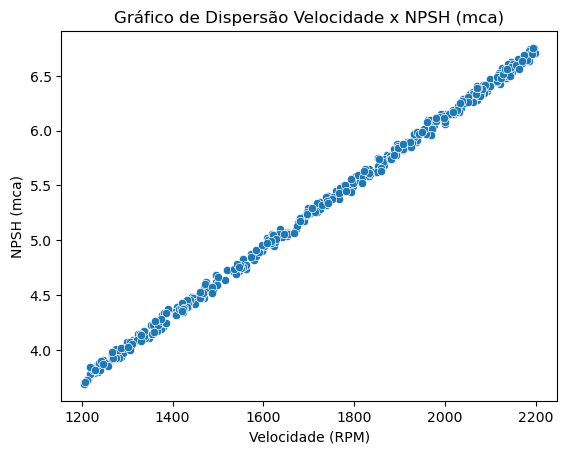

In [45]:
sns.scatterplot(x='Velocidade (RPM)', y='NPSH (mca)', data=df)
plt.title('Gráfico de Dispersão Velocidade x NPSH (mca)')
plt.show()

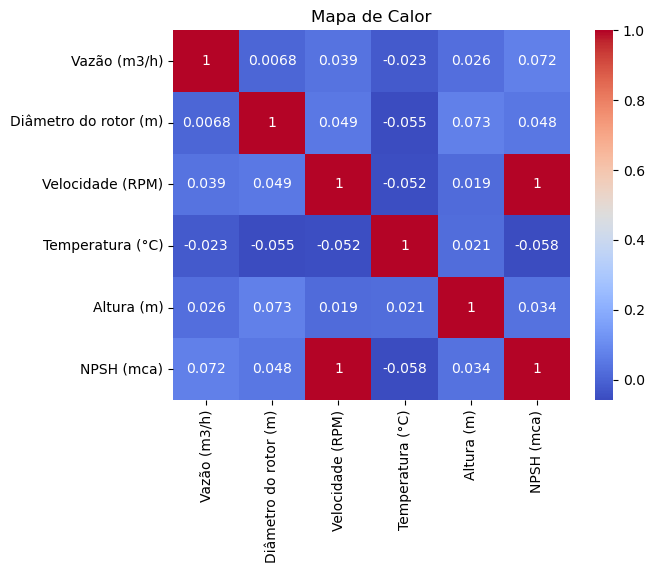

In [46]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor')
plt.show()

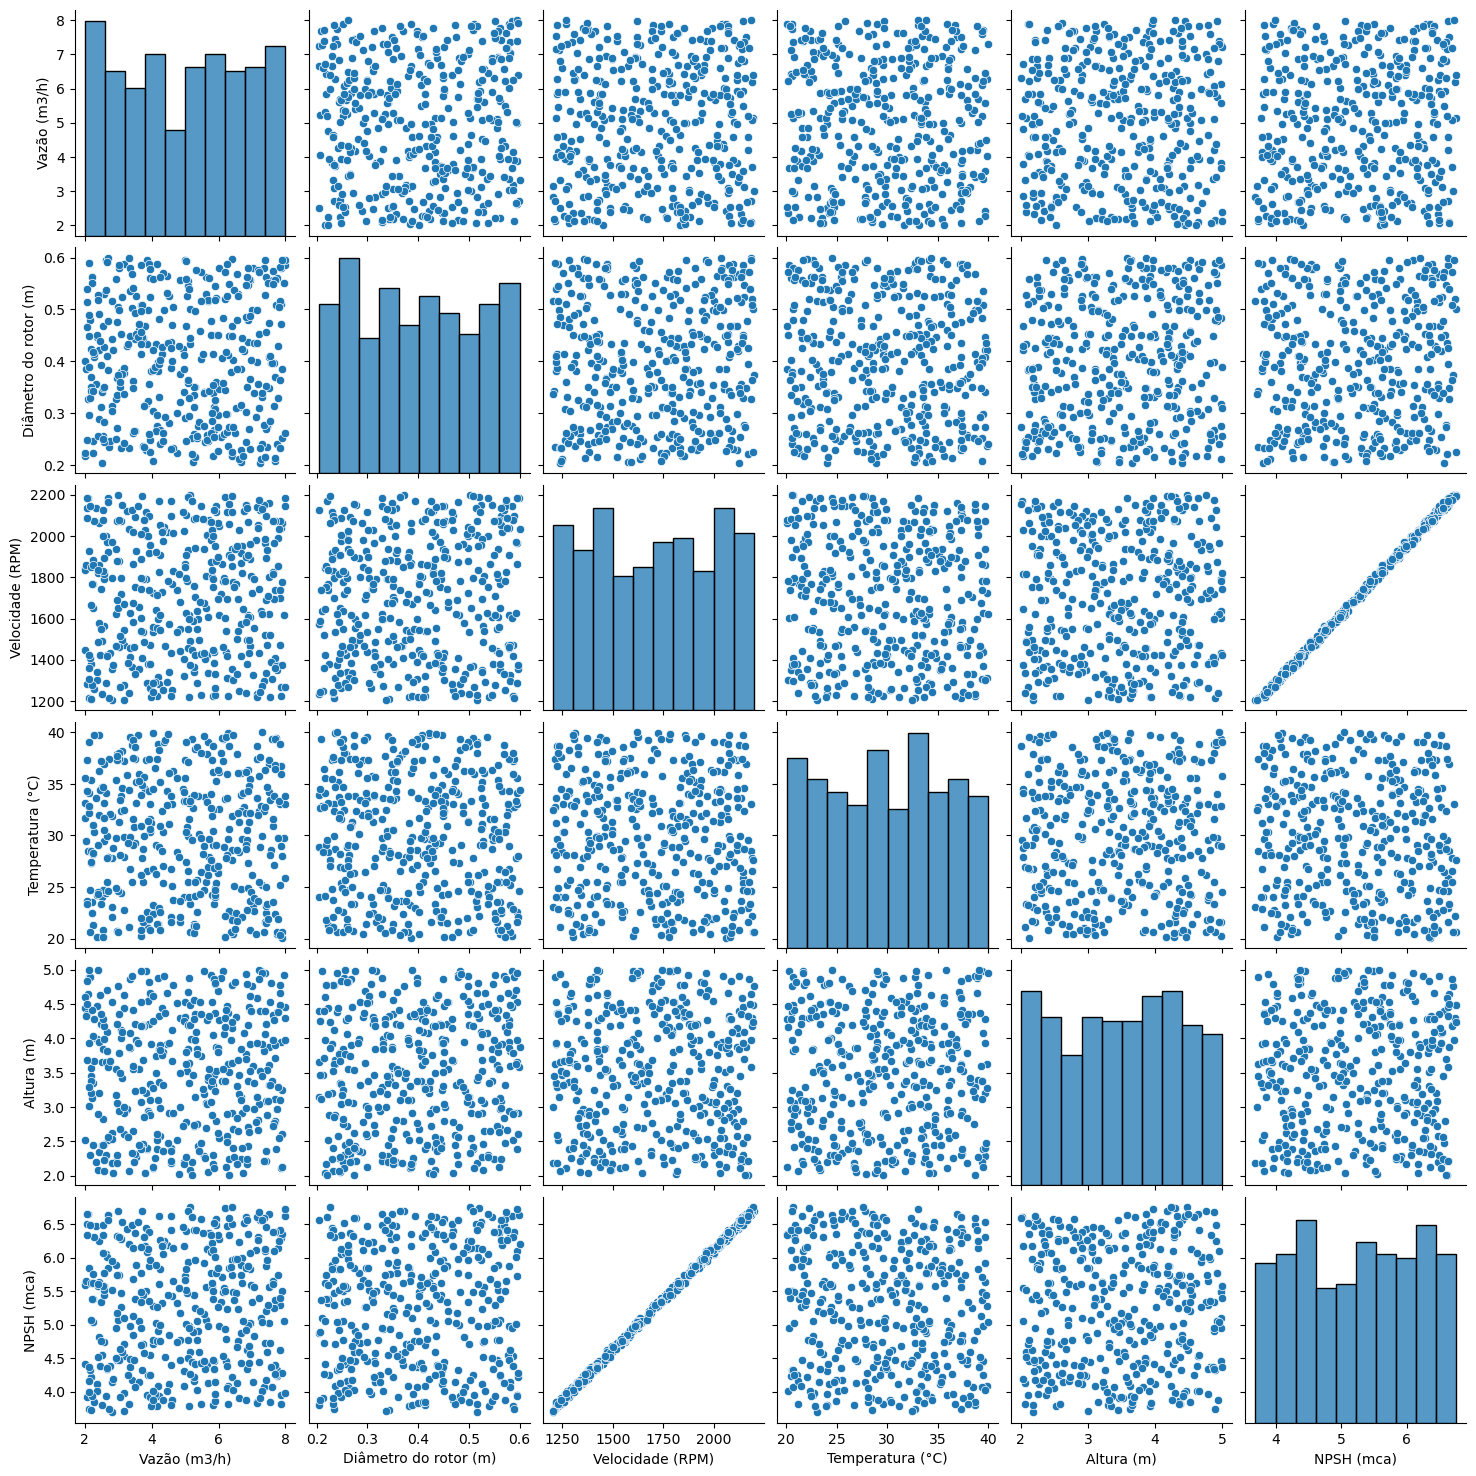

In [47]:
sns.pairplot(df)
plt.show()

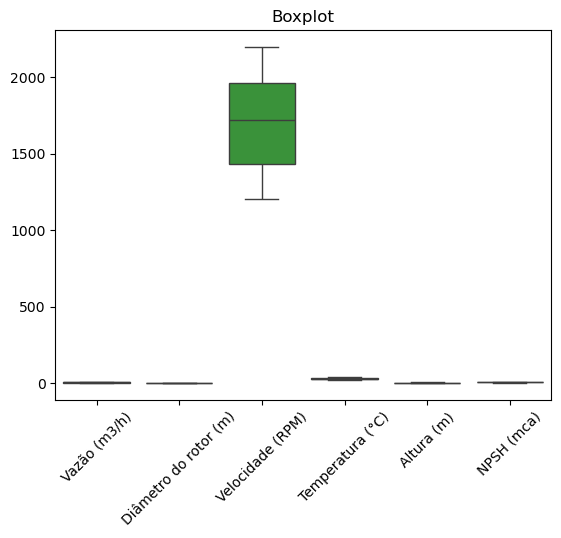

In [48]:
sns.boxplot(data=df)
plt.title('Boxplot')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Correlação da Variável Alvo com as Demais Variáveis')

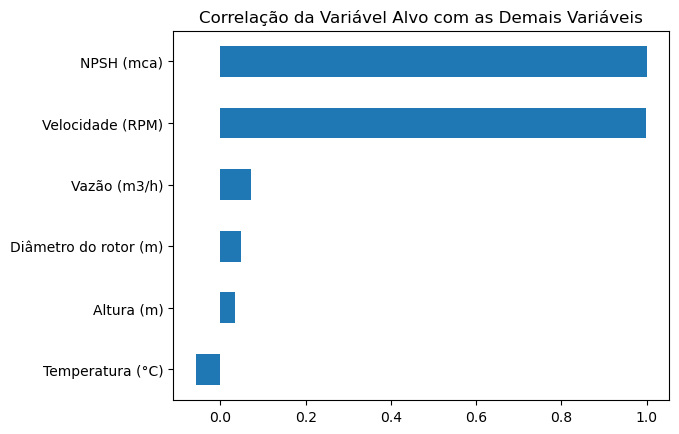

In [49]:
df.corr()['NPSH (mca)'].sort_values().plot(kind='barh')
plt.title('Correlação da Variável Alvo com as Demais Variáveis')

A forte correlação observada entre a Velocidade e o NPSH (Net Positive Suction Head) indica uma relação consistente entre essas variáveis, o que pode refletir um comportamento físico real do sistema analisado. Esse padrão sugere que, à medida que a velocidade do rotor aumenta, há um impacto direto sobre a pressão de sucção da bomba, o que pode exigir um NPSH maior para evitar cavitação.

Essa dependência pode ser consequência de:

* Aumento da velocidade provocando queda de pressão na entrada da bomba, afetando o NPSH disponível.

* Sistemas mais velozes demandando maior NPSH para operar de forma segura e eficiente.

Portanto, essa correlação deve ser analisada com cautela, especialmente em modelos preditivos, pois pode indicar redundância de informação ou até multicolinearidade, exigindo uma avaliação sobre a necessidade de manter ambas as variáveis no modelo ou aplicar técnicas de redução de dimensionalidade.

## Modelo 1: Com a variável “Velocidade”

## Separação do banco de dados em entrada (X) e saída (y)

In [50]:
# Considerando a variável Velocidade nos dados de entrada

X = df.drop(['NPSH (mca)'], axis = 1)
y = df['NPSH (mca)']

## Dividir o banco de dados usando a técnica holdout

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

## Normalização

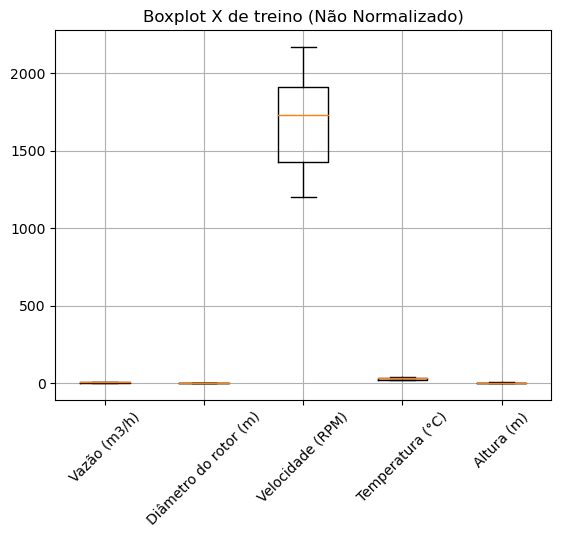

In [52]:
plt.boxplot(X_train,labels=X_train.columns)
plt.title('Boxplot X de treino (Não Normalizado)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

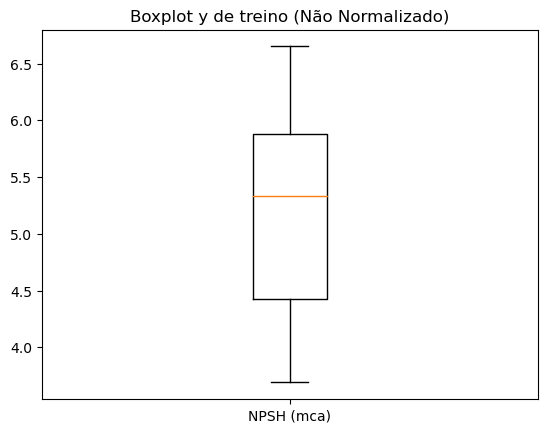

In [53]:
plt.boxplot(y_train)
plt.title('Boxplot y de treino (Não Normalizado)')
plt.xticks([1],['NPSH (mca)'])
plt.show()

In [54]:
# Normalização dados de entrada X_train
scaler_input = MinMaxScaler(feature_range=(-1,1))
scaler_input.fit(X_train)

X_train_norm = scaler_input.transform(X_train)
X_test_norm = scaler_input.transform(X_test)

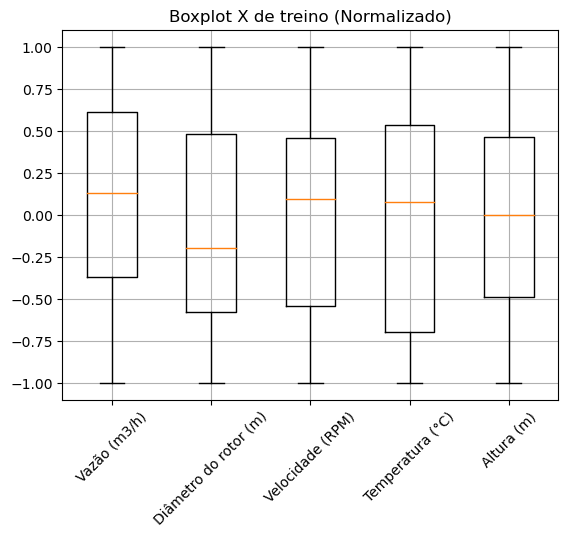

In [55]:
plt.boxplot(X_train_norm,labels=X_train.columns)
plt.title('Boxplot X de treino (Normalizado)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [56]:
# Normalização dados de saída y_train
scaler_output = MinMaxScaler(feature_range=(-1,1))
scaler_output.fit(y_train.values.reshape(-1,1))

y_train_norm = scaler_output.transform(y_train.values.reshape(-1,1))
y_test_norm = scaler_output.transform(y_test.values.reshape(-1,1))

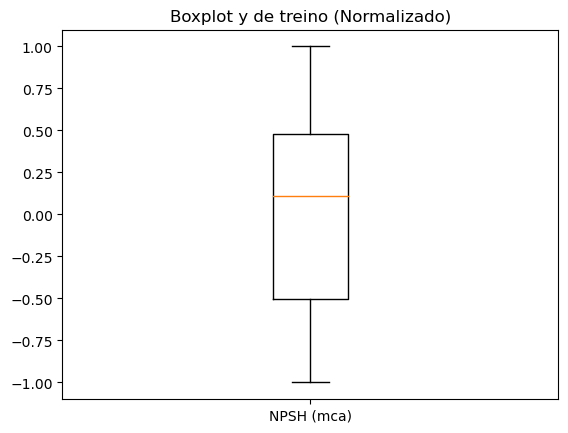

In [57]:
plt.boxplot(y_train_norm)
plt.title('Boxplot y de treino (Normalizado)')
plt.xticks([1],['NPSH (mca)'])
plt.show()

## Sintonia dos Hiperparâmetros

In [58]:
# Definir os valores de hiperparâmetros atrelados à busca em grade
C = [0.001,0.01,0.1,1,10,100,1000]
gamma = [0.001,0.01,0.1,1,10,100,1000]

parameters = {
    'C':C,
    'gamma':gamma
}

# Dataframe para armazenamento dos valores
scores_df = pd.DataFrame(index=gamma, columns=C)

In [59]:
# Instanciar o modelo de predição
model = SVR()

# Executar a busca em grade em conjunto com a técnica k-fold cross validation
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train_norm, y_train_norm.ravel())

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [60]:
# Acessar os hiperparâmetros mais adequados segundo o valor médio da métrica de desempenho
print("Melhores hiperparâmetros:", grid_search.best_params_)

Melhores hiperparâmetros: {'C': 1000, 'gamma': 0.001}


In [61]:
# Acessar o valor médio da métrica de desempenho atrelado aos hiperparâmetros mais adequados
print("Melhor Score:", grid_search.best_score_)

Melhor Score: -0.004134988987929072


In [62]:
# Salvar em um dataframe
info_grid_search = pd.DataFrame.from_dict(grid_search.cv_results_)

In [63]:
# Criar um dataframe a fim de criar um mapa de calor
scores_df = pd.DataFrame()
scores_df['C'] = pd.to_numeric(info_grid_search['param_C'].values)
scores_df['gamma'] = pd.to_numeric(info_grid_search['param_gamma'].values)
scores_df['mean_test_score'] = pd.to_numeric(info_grid_search['mean_test_score'].values)
scores_df = scores_df.pivot(index='gamma', columns='C', values='mean_test_score')

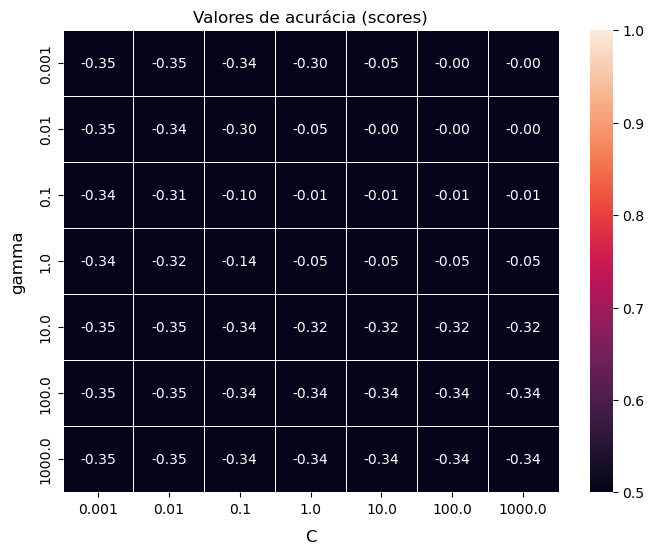

In [64]:
# Heatmap
plt.figure(figsize=(8,6))
ax = sns.heatmap(scores_df, annot=True, fmt=".2f", linewidths=0.6, vmin=0.5, vmax=1.0, cbar=True)
ax.set_title('Valores de acurácia (scores)', fontsize=12)
ax.set_ylabel(ylabel='gamma', fontsize=12, labelpad=10)
ax.set_xlabel(xlabel='C', fontsize=12, labelpad=10)
plt.show()

In [65]:
# Definir os valores para C e gamma:
C = 1000
gamma = 0.001

# Instanciar o tipo de modelo de predição - máquina de vetores de suporte para classificação:
model = SVR(C=C, gamma=gamma)

# Treinar o modelo:
model.fit(X_train_norm, y_train_norm.ravel())

SVR(C=1000, gamma=0.001)

In [66]:
# Estimar a capacidade de generalização do modelo de predição:
y_pred_test = model.predict(X_test_norm)

# Inserir a métrica de desempenho adequada
mse = mean_squared_error(y_test_norm, y_pred_test)
mae = mean_absolute_error(y_test_norm, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_norm, y_pred_test)

In [67]:
# Após model.predict(...)
print("Avaliação do Modelo:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Avaliação do Modelo:
MSE: 0.0036397195740064834
MAE: 0.0528409345901238
RMSE: 0.060330088463439895
R²: 0.99012710472976


O modelo de Regressão por Vetores de Suporte (SVR) desenvolvido para prever o NPSH (Net Positive Suction Head) com base em variáveis operacionais demonstrou excelente desempenho. Após normalização dos dados e ajuste de hiperparâmetros via GridSearchCV, a avaliação sobre a base de teste apresentou:

   * **MSE:** 0.0036
   * **MAE:** 0.0528
   * **RMSE:** 0.0603
   * **R²:** 99.01%
    
Esses resultados indicam que o modelo é altamente preciso e confiável, conseguindo capturar a relação entre as variáveis com alta fidelidade. A alta capaidade de generalização observada reforça a robustez do modelo para aplicação prática no contexto de engenharia de processos.

## Modelo 2: Sem a variável “Velocidade”

In [68]:
# Não considerando a variável Velocidade nos dados de entrada

X_sem_vel = df.drop(['NPSH (mca)', 'Velocidade (RPM)'], axis = 1)
y_sem_vel = df['NPSH (mca)']

In [69]:
X_train_sem_v, X_test_sem_v, y_train_sem_v, y_test_sem_v = train_test_split(X_sem_vel, y_sem_vel, test_size=0.8, random_state=42)

In [70]:
# Normalização dados de entrada X_train
scaler_input_sem_vel = MinMaxScaler(feature_range=(-1,1))
scaler_input_sem_vel.fit(X_train_sem_v)

X_train_norm_sem_vel = scaler_input_sem_vel.transform(X_train_sem_v)
X_test_norm_sem_vel = scaler_input_sem_vel.transform(X_test_sem_v)

In [71]:
# Normalização dados de saída y_train
scaler_output_sem_vel = MinMaxScaler(feature_range=(-1,1))
scaler_output_sem_vel.fit(y_train_sem_v.values.reshape(-1,1))

y_train_norm_sem_vel = scaler_output_sem_vel.transform(y_train_sem_v.values.reshape(-1,1))
y_test_norm_sem_vel = scaler_output_sem_vel.transform(y_test_sem_v.values.reshape(-1,1))

In [72]:
# Definir os valores de hiperparâmetros atrelados à busca em grade
C = [0.001,0.01,0.1,1,10,100,1000]
gamma = [0.001,0.01,0.1,1,10,100,1000]

parameters = {
    'C':C,
    'gamma':gamma
}

# Dataframe para armazenamento dos valores
scores_df = pd.DataFrame(index=gamma, columns=C)

In [73]:
# Instanciar o modelo de predição
model = SVR()

# Executar a busca em grade em conjunto com a técnica k-fold cross validation
grid_search_sem_vel = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)
grid_search_sem_vel.fit(X_train_norm_sem_vel, y_train_norm_sem_vel.ravel())

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [74]:
# Acessar os hiperparâmetros mais adequados segundo o valor médio da métrica de desempenho
print("Melhores hiperparâmetros:", grid_search_sem_vel.best_params_)

Melhores hiperparâmetros: {'C': 1, 'gamma': 10}


In [75]:
# Acessar o valor médio da métrica de desempenho atrelado aos hiperparâmetros mais adequados
print("Melhor Score:", grid_search_sem_vel.best_score_)

Melhor Score: -0.331980335237921


In [76]:
# Salvar em um dataframe
info_grid_search_sem_vel = pd.DataFrame.from_dict(grid_search_sem_vel.cv_results_)

In [77]:
# Criar um dataframe a fim de criar um mapa de calor
scores_df = pd.DataFrame()
scores_df['C'] = pd.to_numeric(info_grid_search_sem_vel['param_C'].values)
scores_df['gamma'] = pd.to_numeric(info_grid_search_sem_vel['param_gamma'].values)
scores_df['mean_test_score'] = pd.to_numeric(info_grid_search_sem_vel['mean_test_score'].values)
scores_df = scores_df.pivot(index='gamma', columns='C', values='mean_test_score')

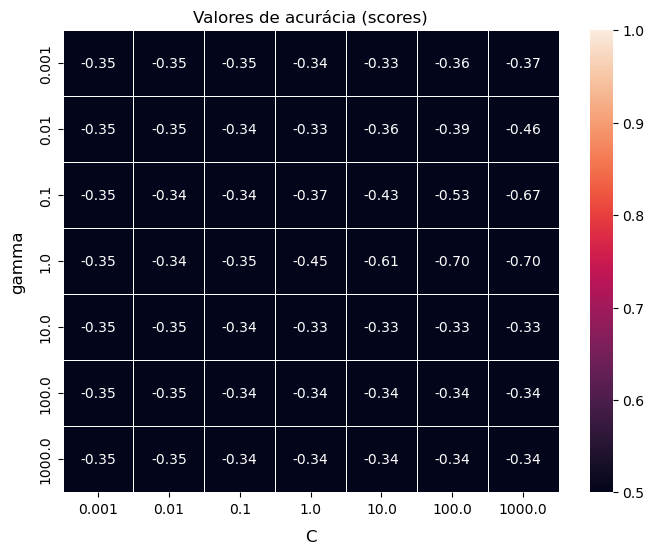

In [78]:
# Heatmap
plt.figure(figsize=(8,6))
ax = sns.heatmap(scores_df, annot=True, fmt=".2f", linewidths=0.6, vmin=0.5, vmax=1.0, cbar=True)
ax.set_title('Valores de acurácia (scores)', fontsize=12)
ax.set_ylabel(ylabel='gamma', fontsize=12, labelpad=10)
ax.set_xlabel(xlabel='C', fontsize=12, labelpad=10)
plt.show()

In [79]:
# Definir os valores para C e gamma:
C = 1
gamma = 10

# Instanciar o tipo de modelo de predição - máquina de vetores de suporte para classificação:
model = SVR(C=C, gamma=gamma)

# Treinar o modelo:
model.fit(X_train_norm_sem_vel, y_train_norm_sem_vel.ravel())

SVR(C=1, gamma=10)

In [80]:
# Estimar a capacidade de generalização do modelo de predição:
y_pred_test_sv = model.predict(X_test_norm_sem_vel)

# Inserir a métrica de desempenho adequada
mse_sv = mean_squared_error(y_test_norm_sem_vel, y_pred_test_sv)
mae_sv = mean_absolute_error(y_test_norm_sem_vel, y_pred_test_sv)
rmse_sv = np.sqrt(mse_sv)
r2_sv = r2_score(y_test_norm_sem_vel, y_pred_test_sv)

In [81]:
# Após model.predict(...)
print("Avaliação do Modelo:")
print(f"MSE: {mse_sv}")
print(f"MAE: {mae_sv}")
print(f"RMSE: {rmse_sv}")
print(f"R²: {r2_sv}")

Avaliação do Modelo:
MSE: 0.3983654737124219
MAE: 0.5490851137872257
RMSE: 0.6311620027476479
R²: -0.08058341343944986


## Comparação do desempenho dos modelos com e sem a variável 'Velocidade'

In [82]:
dados_desempenho = {
    'Métrica':['MSE', 'MAE', 'RMSE', 'R2'],
    'Modelo 1 (Com Velocidade)':[mse, mae, rmse, r2],
    'Modelo 2 (Sem Velocidade)':[mse_sv, mae_sv, rmse_sv, r2_sv],
}

In [83]:
tabela_desempenho = pd.DataFrame(dados_desempenho)
tabela_desempenho

,Métrica,Modelo 1 (Com Velocidade),Modelo 2 (Sem Velocidade)
0,MSE,0.003640,0.398365
1,MAE,0.052841,0.549085
2,RMSE,0.060330,0.631162
3,R2,0.990127,-0.080583


## Ponderação Final

Após a remoção da variável "Velocidade" do conjunto de dados, foi desenvolvido um novo modelo preditivo utilizando SVR. O objetivo era investigar se a exclusão de uma variável altamente correlacionada com a variável alvo (NPSH) poderia impactar a capacidade de generalização do modelo.

No entanto, os resultados mostraram um desempenho significativamente inferior, com R² = -0.08, indicando que o modelo não consegue explicar a variabilidade do NPSH adequadamente. O aumento expressivo nos valores de MAE e RMSE reforça que a variável "Velocidade" possui um papel relevante na construção de um modelo robusto de predição de NPSH.

Dessa forma, conclui-se que, apesar da correlação observada entre "Velocidade" e "NPSH", sua presença é essencial para garantir a precisão e capacidade de generalização do modelo.